<a href="https://colab.research.google.com/github/bachinaram/DataAnalytics1/blob/main/DA1_assignment1q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Data Cleaning ***

1. Dropping columns with unwanted data for analytics
2. Data conversion from object to numerical by stripping extra characters and later convert to numerical data
3. For missing data in numerical columns - mean of all rows is calculated and adding the mean in the missing rows for that feature 
4.  Features are also dropped if the data is missing over more than 30% 






In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df1 = pd.read_csv("/content/sample_data/football_data.csv")
pd.set_option('display.max_rows', 600)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 999)
#df1.head()
#dropping unwanted columns
df1.drop(columns='Release Clause')
df1.drop(['ID', 'Name', 'Photo', 'Flag', 'Club Logo', 'Loaned From'], axis=1, inplace=True)
#once we delete and we try to run it again we get error
#df1.head()
#checking to see if it really deleted
# Converting  the columns to string for striping the unwanted data.
df1_int_list = ['LS',	'ST',	'RS',	'LW',	'LF',	'CF',	'RF',	'RW',	'LAM',	'CAM',	'RAM',	'LM',	'LCM',	'CM',	'RCM',	'RM',	'LWB',	'LDM',	'CDM',	'RDM',	'RWB',	'LB',	'LCB',	'CB',	'RCB',	'RB']
for i in df1_int_list :
  # Converting the column data to string
  df1[i] = df1[i].astype(str)
  #Imputation on numeric values
  df1[i].fillna("0", inplace = True)
  #Striping the data that is present after "+"
  df1[i] = df1[i].map(lambda x: x.split("+", 1)[0].rstrip())
#Finding the NULL values present in each column
print("Below columns have null values")
df1.isnull().sum()


Below columns have null values


Unnamed: 0                     0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                         241
Value                          0
Wage                           0
Special                        0
Preferred Foot                48
International Reputation      48
Weak Foot                     48
Skill Moves                   48
Work Rate                     48
Body Type                     48
Real Face                     48
Position                      60
Jersey Number                 60
Joined                      1553
Contract Valid Until         289
Height                        48
Weight                        48
LS                             0
ST                             0
RS                             0
LW                             0
LF                             0
CF                             0
RF                             0
RW                             0
LAM       

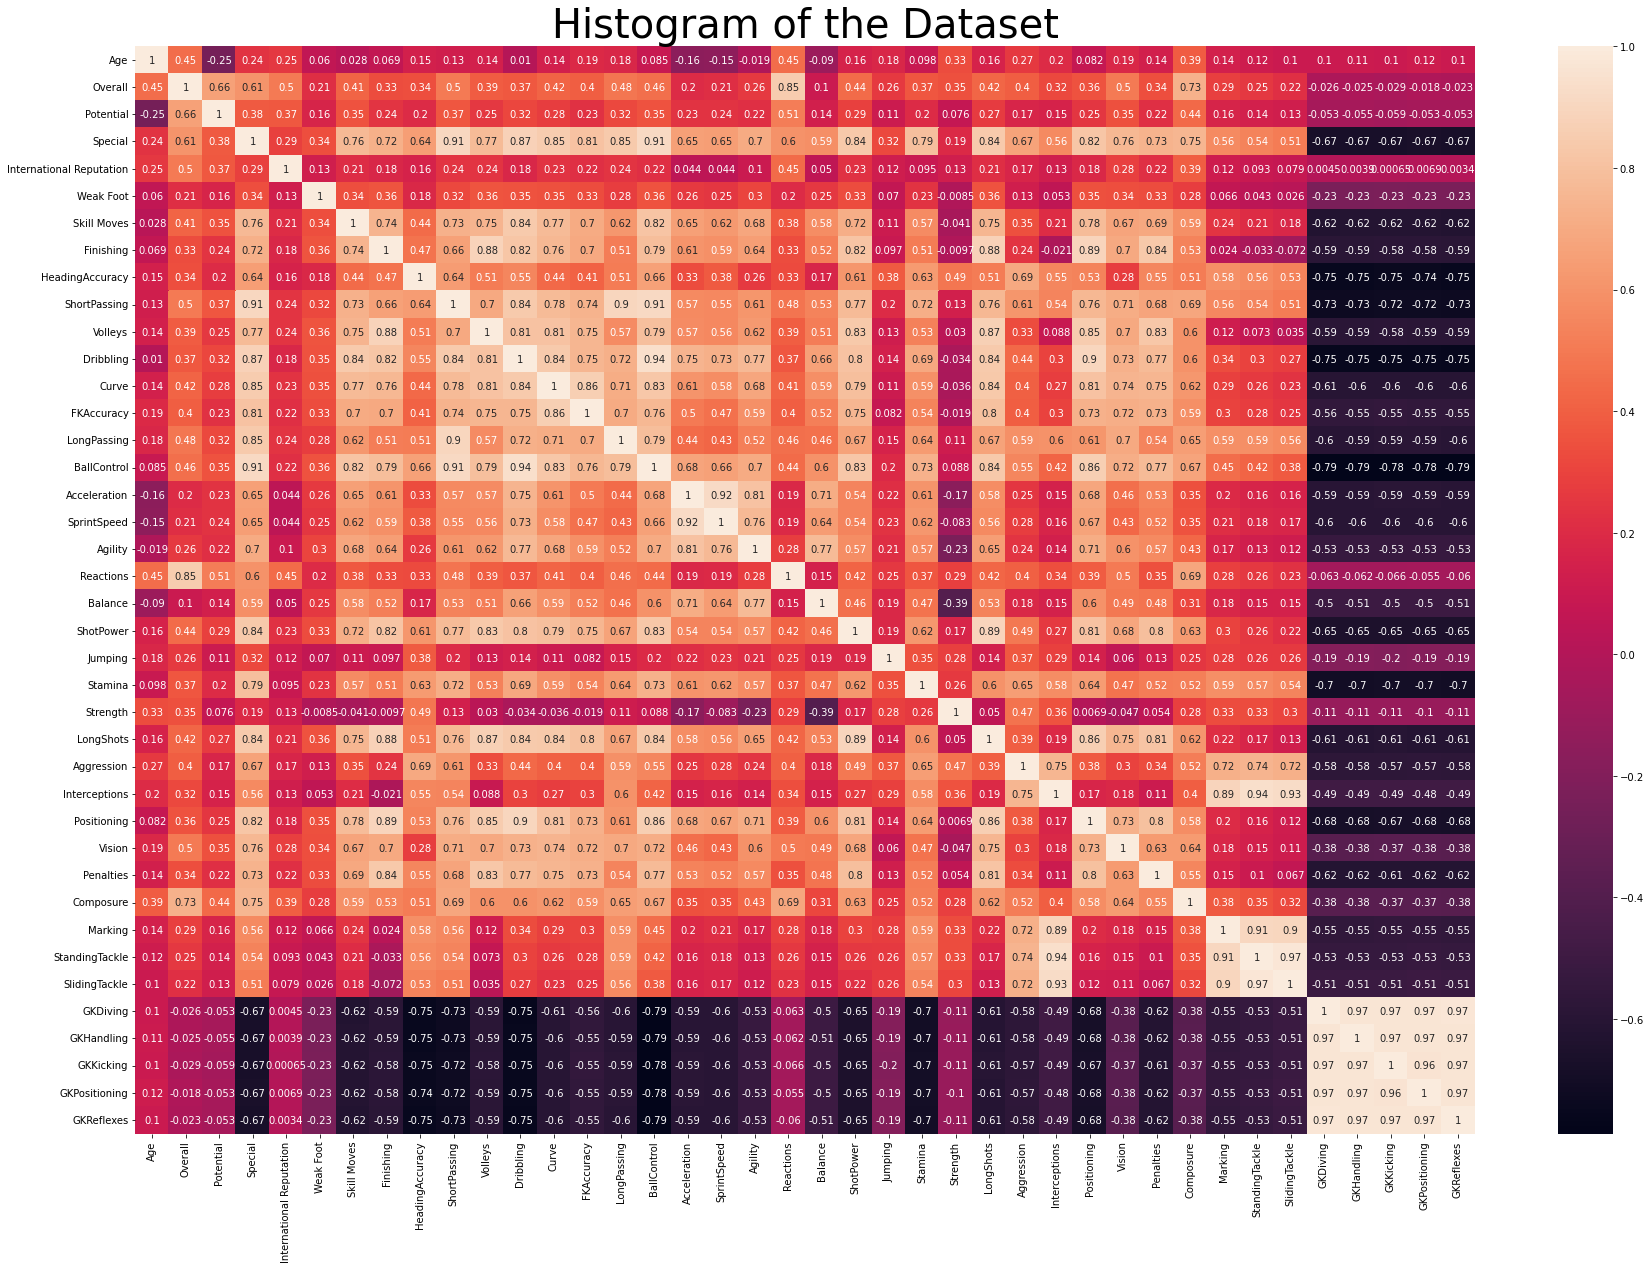

In [22]:
# Heatmap for the data frame
# plotting a correlation heatmap

plt.rcParams['figure.figsize'] = (30, 20)
sns.heatmap(df1[['Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']].corr(), annot = True)

plt.title('Histogram of the Dataset', fontsize = 40)
plt.show()

In [23]:
df1.describe()

,Unnamed: 0,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.00

In [24]:
# Imputing the Numeric values
# football_df['Goal_Keeper'].fillna(football_df['Goal_Keeper'].mean(), inplace = True)
#As a part of data cleaning process missing values for some of the features is added after describing the data frame
#It is important to keep mean for data columns like Volleys, lonpassing, Head accuracy, ball control dribbling, curve, short passing,
#finishing and crossing
df1['Wage'].fillna('€200K', inplace = True)
df1['Preferred Foot'].fillna('Right', inplace = True)
df1['Volleys'].fillna(df1['Volleys'].mean(), inplace = True)
df1['Joined'].fillna('Jul 1, 2018', inplace = True)
df1['LongPassing'].fillna(df1['LongPassing'].mean(), inplace = True)
df1['Weight'].fillna('200lbs', inplace = True)
df1['Contract Valid Until'].fillna(2019, inplace = True)
df1['HeadingAccuracy'].fillna(df1['HeadingAccuracy'].mean(), inplace = True)
df1['Height'].fillna("5'11", inplace = True)
df1['BallControl'].fillna(df1['BallControl'].mean(), inplace = True)
df1['FKAccuracy'].fillna(df1['FKAccuracy'], inplace = True)
df1['Jersey Number'].fillna(8, inplace = True)
df1['Body Type'].fillna('Normal', inplace = True)
df1['Dribbling'].fillna(df1['Dribbling'].mean(), inplace = True)
df1['Position'].fillna('ST', inplace = True)
df1['Curve'].fillna(df1['Curve'].mean(), inplace = True)
df1['Club'].fillna('No Club', inplace = True)
df1['ShortPassing'].fillna(df1['ShortPassing'].mean(), inplace = True)
df1['Work Rate'].fillna('Medium/ Medium', inplace = True)
df1['Skill Moves'].fillna(df1['Skill Moves'].median(), inplace = True)
df1['Weak Foot'].fillna(3, inplace = True)
df1['Finishing'].fillna(df1['Finishing'].mean(), inplace = True)
df1['International Reputation'].fillna(1, inplace = True)
df1['Wage'].fillna('€200K', inplace = True)
df1['Crossing'].fillna(df1['Crossing'].mean(), inplace = True)


In [25]:
# Finding the Null values present in the datset.
#if data is missing more than 33% pecentage of given data then we need to remove the entire feature
size = len(df1)
percent_missing = df1.isnull().sum() * 100 / size
table_for_values_missing = pd.DataFrame({'features': df1.columns,
                                 'percent_missing': round(percent_missing, 2)})
table_for_values_missing

,features,percent_missing
Unnamed: 0,Unnamed: 0,0.00
Age,Age,0.00
Nationality,Nationality,0.00
Overall,Overall,0.00
Potential,Potential,0.00
Club,Club,0.00
Value,Value,0.00
Wage,Wage,0.00
Special,Special,0.00
Preferred Foot,Preferred Foot,0.00


In [26]:
df1['LS'] = df1['LS'].map(lambda x: x.split("+", 1)[0].rstrip())
df1.shape

(18207, 83)

In [27]:
#df1.info()

In [28]:
# select the float columns
df_num = df1.select_dtypes(include=[np.float])
df_num = df1.select_dtypes(include=[np.int])
# select non-numeric columns
df_obj = df1.select_dtypes(include=[np.object])

print(df_num)

       Unnamed: 0  Age  Overall  Potential  Special
0               0   31       94         94     2202
1               1   33       94         94     2228
2               2   26       92         93     2143
3               3   27       91         93     1471
4               4   27       91         92     2281
...           ...  ...      ...        ...      ...
18202       18202   19       47         65     1307
18203       18203   19       47         63     1098
18204       18204   16       47         67     1189
18205       18205   17       47         66     1228
18206       18206   16       46         66     1321

[18207 rows x 5 columns]


In [29]:
df_num.head()

,Unnamed: 0,Age,Overall,Potential,Special
0,0,31,94,94,2202
1,1,33,94,94,2228
2,2,26,92,93,2143
3,3,27,91,93,1471
4,4,27,91,92,2281


In [30]:
df_obj.head()
#categorical data


,Nationality,Club,Value,Wage,Preferred Foot,Work Rate,Body Type,Real Face,Position,Joined,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Release Clause
0,Argentina,FC Barcelona,€110.5M,€565K,Left,Medium/ Medium,Messi,Yes,RF,"Jul 1, 2004",2021,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,€226.5M
1,Portugal,Juventus,€77M,€405K,Right,High/ Low,C. Ronaldo,Yes,ST,"Jul 10, 2018",2022,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,€127.1M
2,Brazil,Paris Saint-Germain,€118.5M,€290K,Right,High/ Medium,Neymar,Yes,LW,"Aug 3, 2017",2022,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,€228.1M
3,Spain,Manchester United,€72M,€260K,Right,Medium/ Medium,Lean,Yes,GK,"Jul 1, 2011",2020,6'4,168lbs,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,€138.6M
4,Belgium,Manchester City,€102M,€355K,Right,High/ High,Normal,Yes,RCM,"Aug 30, 2015",2023,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,€196.4M


In [31]:
#data inspection
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})
inspect_data(df_obj)

,Data Type,No of Levels,Levels
Nationality,object,164,['Argentina' 'Portugal' 'Brazil' 'Spain' 'Belg...
Club,object,652,['FC Barcelona' 'Juventus' 'Paris Saint-Germai...
Value,object,217,['€110.5M' '€77M' '€118.5M' '€72M' '€102M' '€9...
Wage,object,144,['€565K' '€405K' '€290K' '€260K' '€355K' '€340...
Preferred Foot,object,2,['Left' 'Right']
Work Rate,object,9,['Medium/ Medium' 'High/ Low' 'High/ Medium' '...
Body Type,object,10,['Messi' 'C. Ronaldo' 'Neymar' 'Lean' 'Normal'...
Real Face,object,3,['Yes' 'No' nan]
Position,object,27,['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LC...
Joined,object,1736,"['Jul 1, 2004' 'Jul 10, 2018' 'Aug 3, 2017' ....."


In [32]:
clud_df_columns = df1['Club'].unique()
# print(clud_df_columns)
club_df_counts = df1['Club'].value_counts()
# club_df_counts.
print(club_df_counts)

No Club                241
Eintracht Frankfurt     33
Cardiff City            33
Manchester City         33
FC Barcelona            33
                      ... 
Grêmio                  20
Atlético Paranaense     20
Limerick FC             19
Sligo Rovers            19
Derry City              18
Name: Club, Length: 652, dtype: int64


In [33]:
# Converting the price value to float



def extract_value_from(Value):

    out = Value.replace('€', '')

    if 'M' in out:

        out = float(out.replace('M', ''))*1000000

    elif 'K' in Value:

        out = float(out.replace('K', ''))*1000

    return float(out)

In [34]:
#below statements are one time action for imputation
df1['Wage'] = df1['Wage'].apply(lambda x: extract_value_from(x))
df1['Value'] = df1['Value'].apply(lambda x: extract_value_from(x))


# Converting the height format 

#football_df.replace({"Height": {"'" : "."}}, regex=True, inplace=True)

# Converting the Weight format 

df1.replace({"Weight": {"lbs" : ""}}, regex=True, inplace=True)

# Converting the Wage format 

#football_df.replace({"Wage": {"K" : "000"}}, regex=True, inplace=True)

# Converting the Value format 

#football_df.replace({"Value": {"M" : "000000"}}, regex=True, inplace=True)



In [35]:
#use the below dataframe to see if the data converted to float
df1['Value']
df1['Wage']
#football_df['Release Clause']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

#Question1 - part1
"get current axes". "Current" here means that it provides a handle to the last active axes. If there is no axes yet, an axes will be created.

1. count of players based on height
2. skill moves feature to show no of players have the skill moves
3. We can also consider the feature like Preferred foot (right or left)

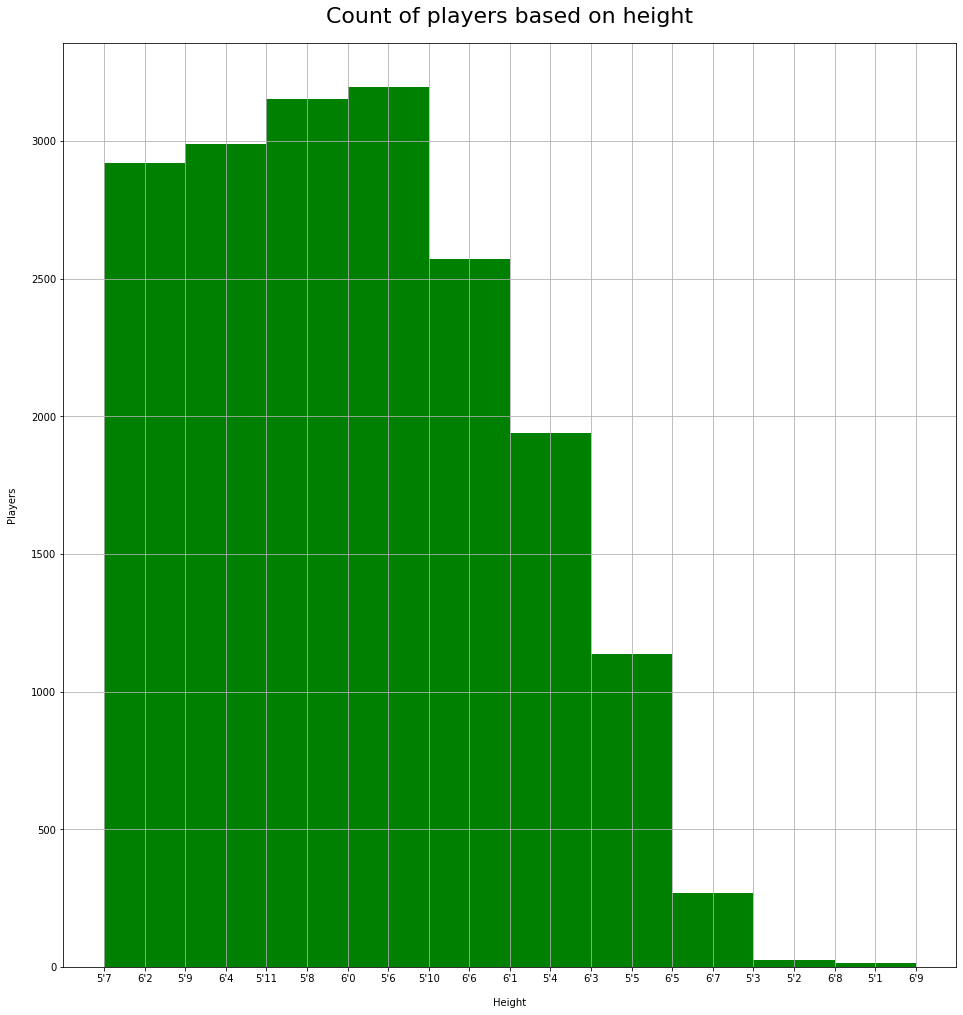

In [43]:

dimension = plt.figure(figsize = (16,17))
current_gca = dimension.gca()
plt.xlabel("Height", labelpad=14)
plt.ylabel("Players", labelpad=14)
plt.title("Count of players based on height", y=1.015, fontsize=22);
df1['Height'].hist(color='green',ax=current_gca)

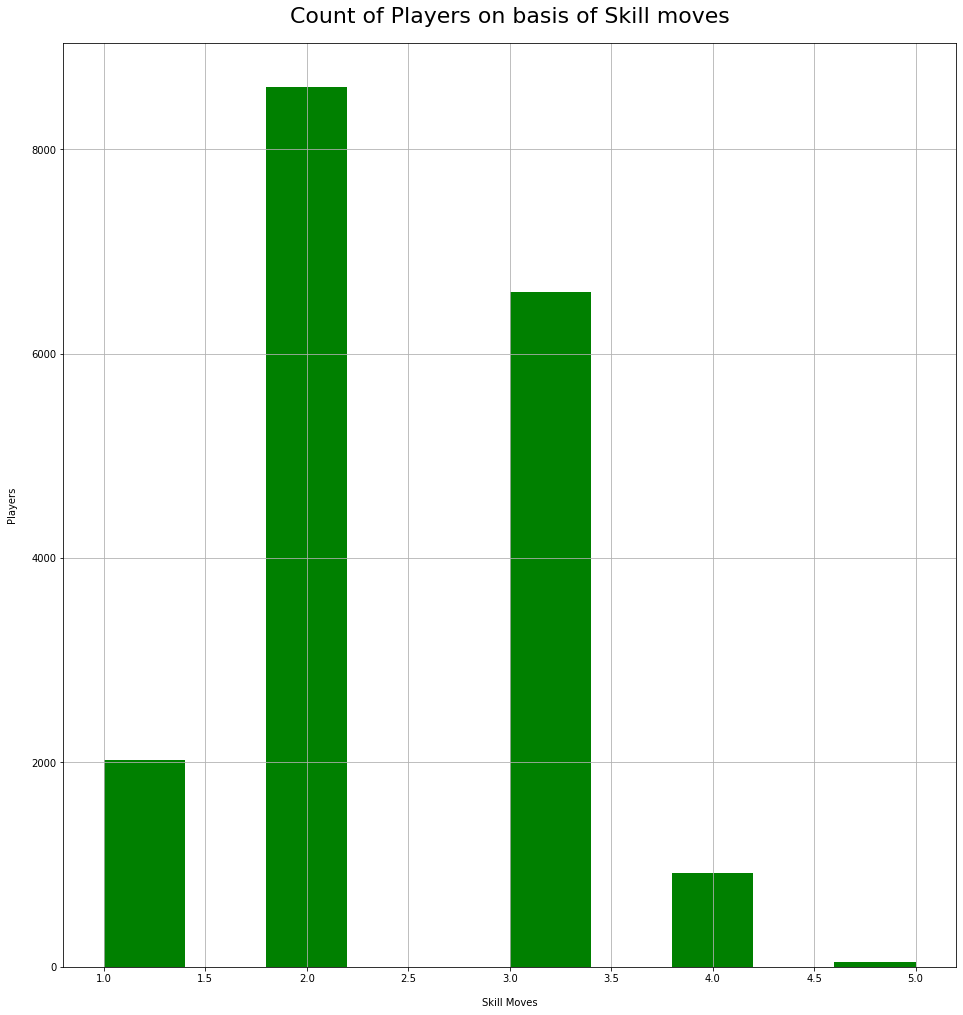

In [49]:
dimension = plt.figure(figsize = (16,17))
current_gca = dimension.gca()
plt.xlabel("Skill Moves", labelpad=14)
plt.ylabel("Players", labelpad=14)
plt.title("Count of Players on basis of Skill moves", y=1.015, fontsize=22);
df1['Skill Moves'].hist(color='green',ax=current_gca)

#Question1 - part2
Distribution of players in different clubs/country on the basis of some attribute.

1. Position of players based on the club - Scatterplot
2. Position of players based on the Nationality - Scatterplot
3. Counting the No of players belongs to club(unique with hue of Overall ranking)

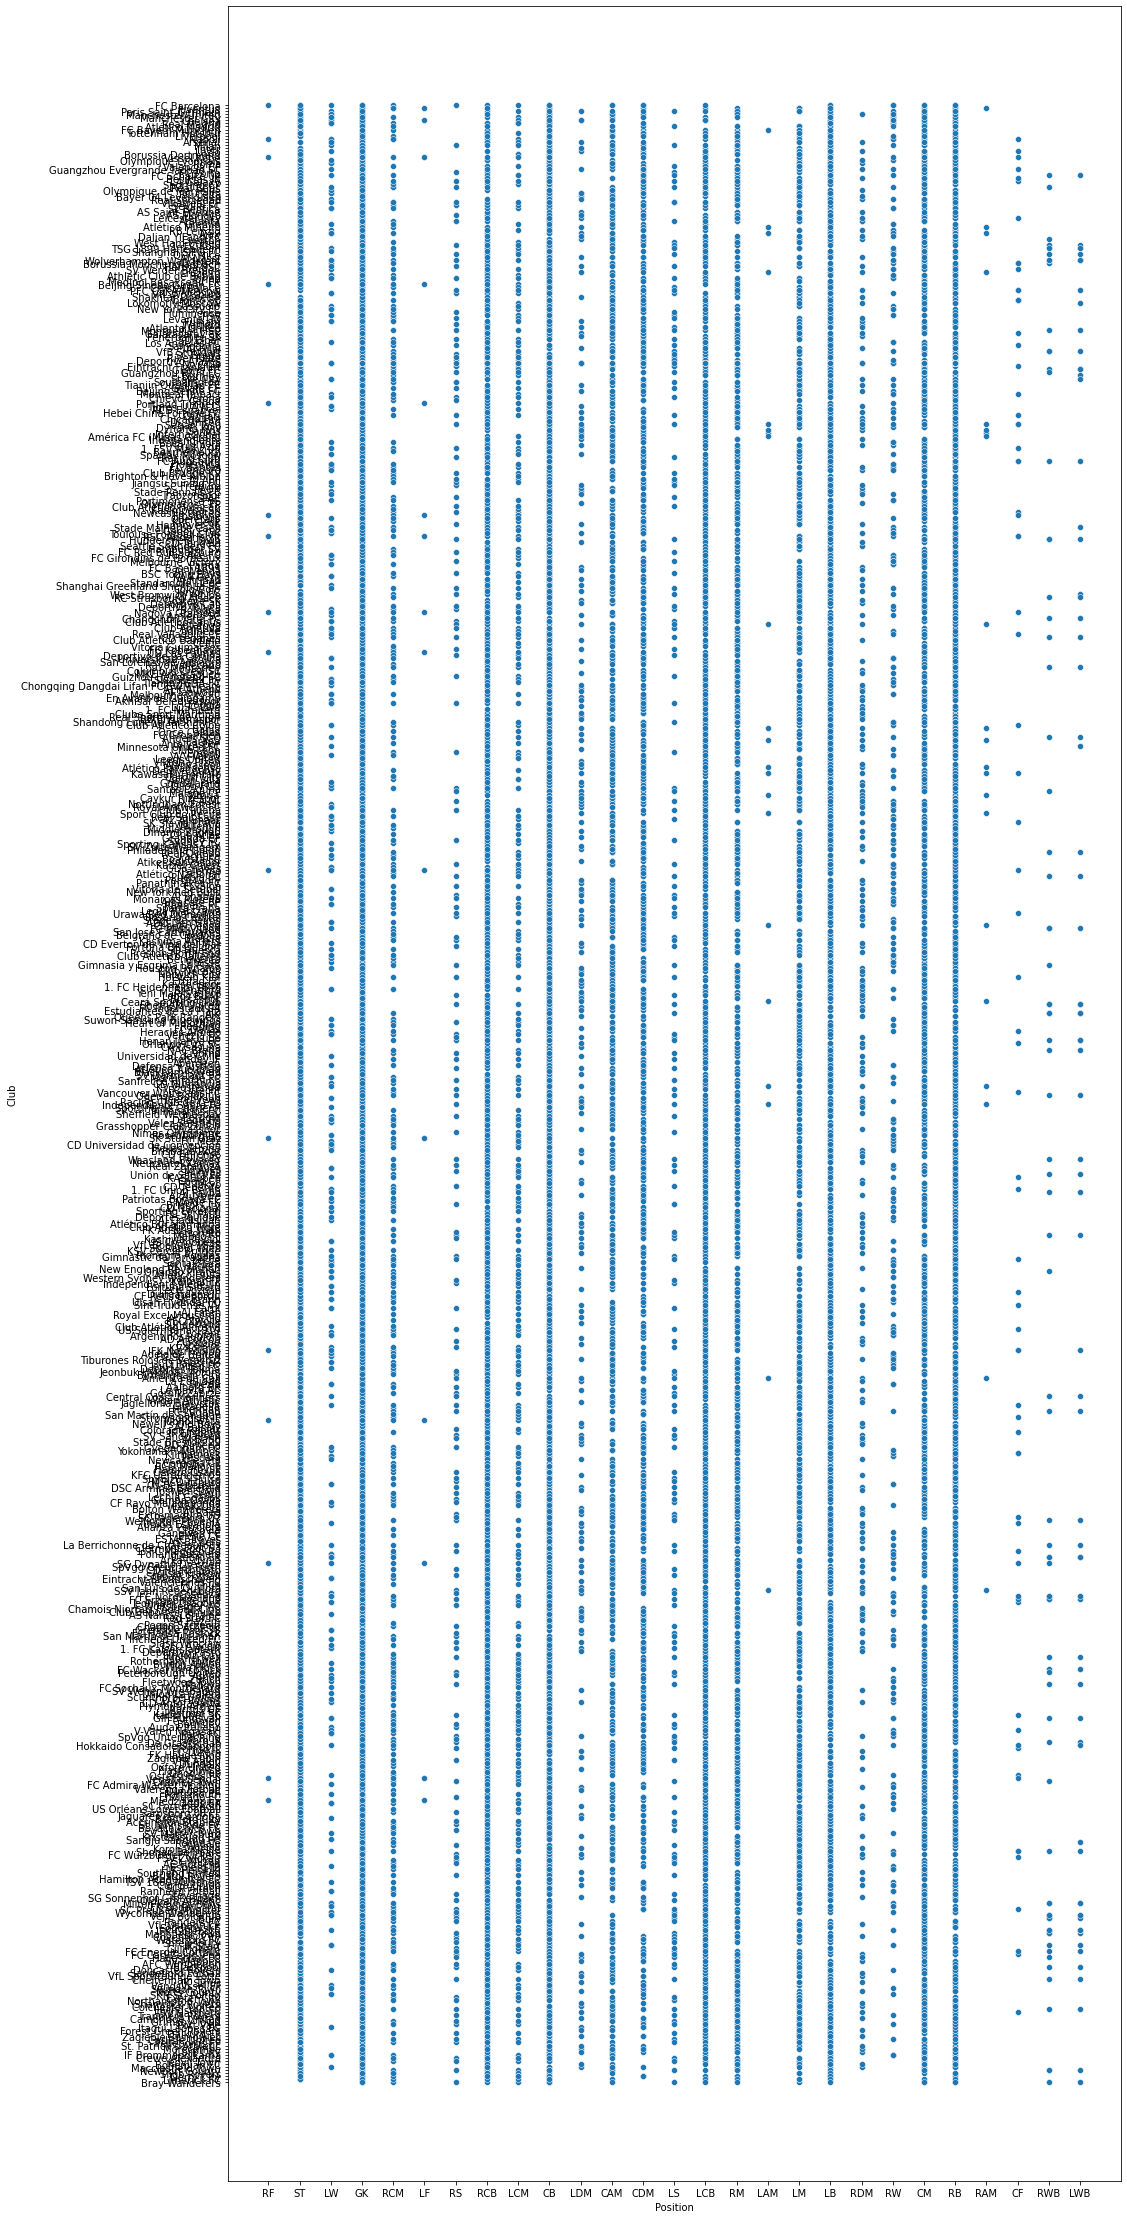

In [62]:
dimension = plt.figure(figsize = (16,40))
sns.scatterplot(x ='Position', y ='Club', data = df1)

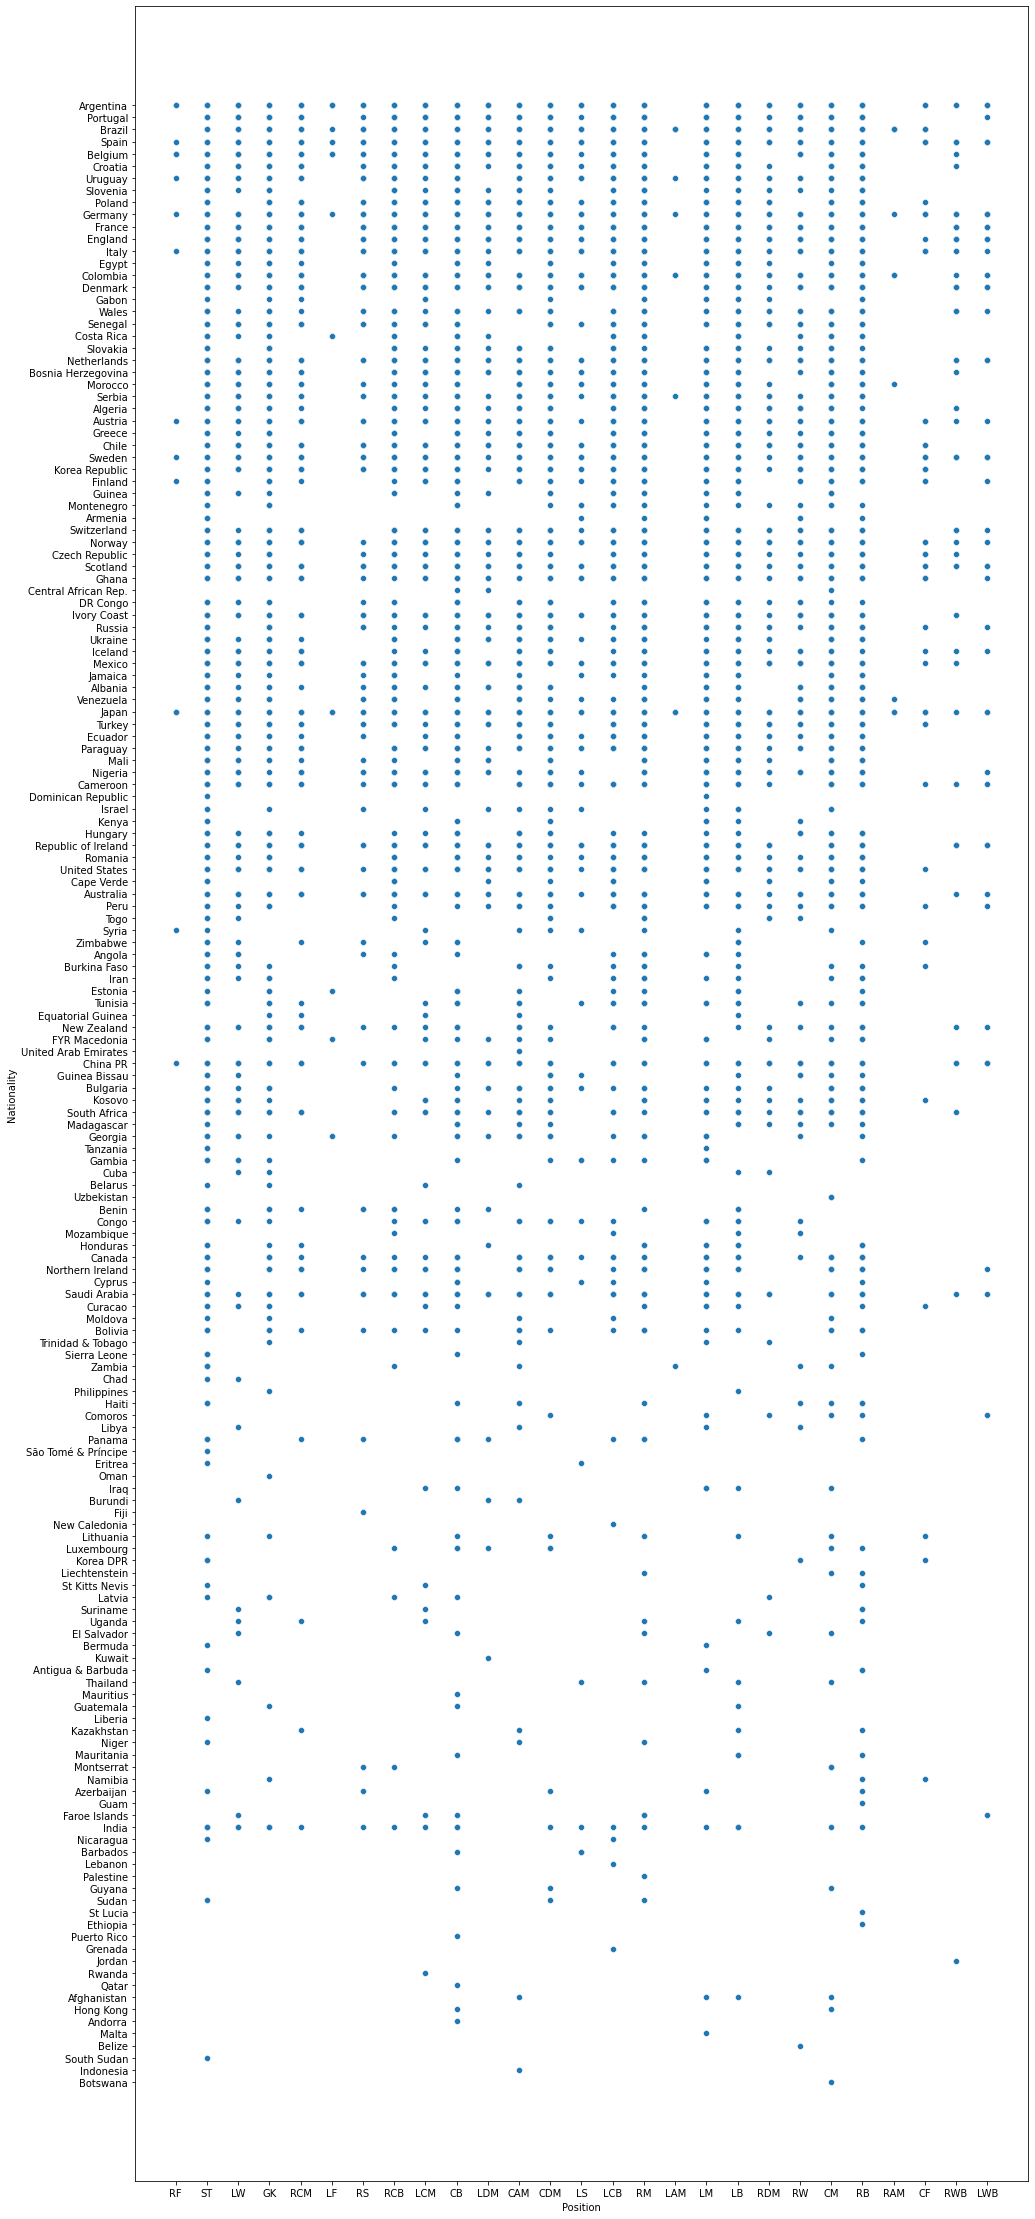

In [58]:
dimension = plt.figure(figsize = (16,40))
sns.scatterplot(x ='Position', y ='Nationality', data = df1)

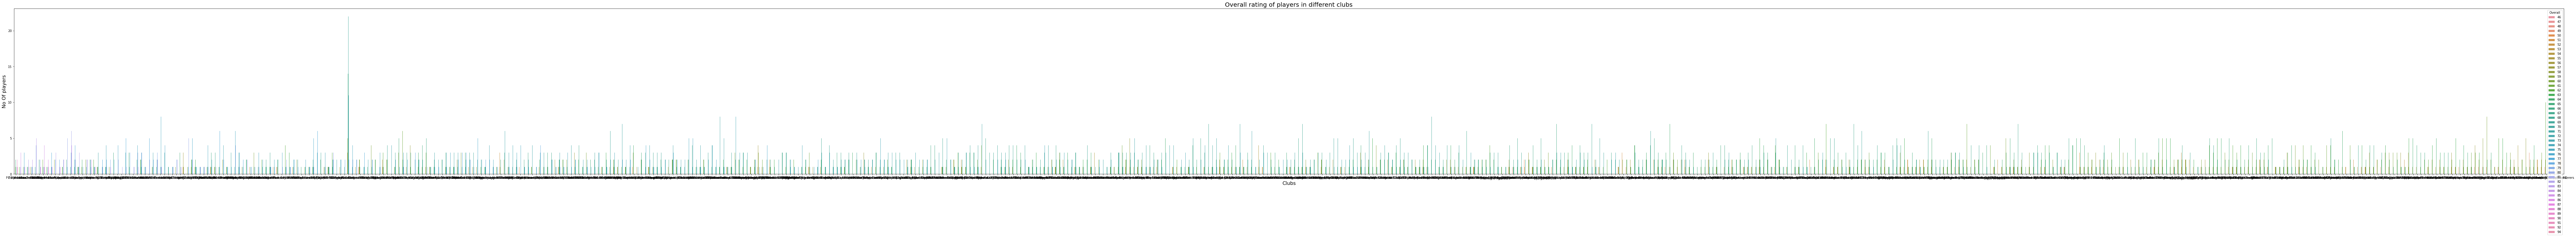

In [64]:
#runs for nearly 2 mins 
plt.figure(figsize = (150, 10))
ax1 = sns.countplot(x = 'Club',hue='Overall',data = df1)
ax1.set_title(label = f'Overall rating of players in different clubs', fontsize = 20)
ax1.set_xlabel(xlabel = f'Clubs', fontsize = 16)
ax1.set_ylabel(ylabel = 'No Of players', fontsize = 16)
plt.show()

In [63]:
#converting to inches for numerical data
a=[]
for i in df1['Height']:
  convert_feet = i.split("'")[0]
  convert_inch = i.split("'")[1].split("\"")[0]
  total_inches = int(convert_feet) * 12 + int(convert_inch)
  a.append(total_inches)
  #football_df['Height'] = football_df['Height'].replace(['i'],'total_inches')
df1['Height']=a;

AttributeError: ignored

In [47]:
#a = ['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',	'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']
objtofloat = ['Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',	'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB']

df1.head()
##I have to work on it
for a in objtofloat:
   df1[a] = df1[a].astype(float, errors = 'raise')



In [ ]:
df2 = df1
correlated_features = set()
correlation_matrix = df2.corr()


for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'BallControl',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'Dribbling',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Interceptions',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LW',
 'Marking',
 'Overall',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'ShortPassing',
 'SlidingTackle',
 'SprintSpeed',
 'StandingTackle'}

In [ ]:
len(correlated_features)

37

Text(0.5, 1.0, 'Correlated Map - Features of players according to their Positioning')

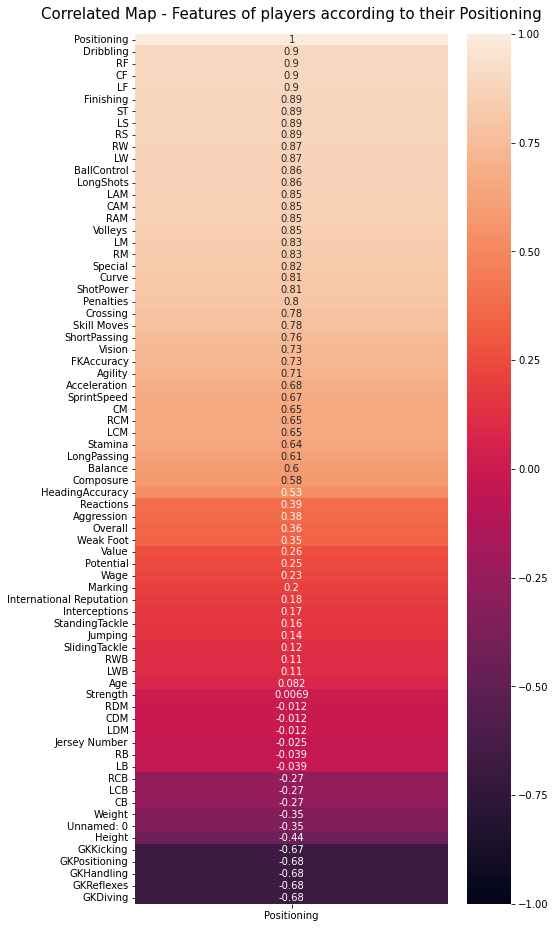

In [ ]:
#all the na values are automatically excluded when doing the pairwise comparision
#we are correlating all the columns with Positioning column, so the value of Position will becomes 1

plt.figure(figsize=(7,16))
#heatmap1 = sns.heatmap(df2.corr()[['Positioning']].sort_values(by="Positioning",ascending=False),vmin=-2,vmax=2, annot=True)
heatmap1 = sns.heatmap(correlation_matrix[['Positioning']].sort_values(by="Positioning",ascending=False),vmin=-1,vmax=1, annot=True)
heatmap1.set_title('Correlated Map - Features of players according to their Positioning', fontdict={'fontsize':15},pad=15)


In [ ]:
print(correlated_features)

{'Interceptions', 'RM', 'SlidingTackle', 'BallControl', 'ST', 'RCM', 'CF', 'CB', 'LDM', 'RF', 'RW', 'ShortPassing', 'RCB', 'RS', 'GKPositioning', 'GKHandling', 'Overall', 'SprintSpeed', 'StandingTackle', 'RWB', 'LW', 'Dribbling', 'LF', 'GKKicking', 'LCB', 'CM', 'RAM', 'RDM', 'LAM', 'LM', 'LB', 'GKReflexes', 'CAM', 'Marking', 'CDM', 'LCM', 'RB'}


In [ ]:
def snsplotting(name): 
    plt.figure(figsize = (15, 10))
    ax = sns.countplot(x = name,data = df_obj, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} in Foot per inch', fontsize = 16)
    ax.set_ylabel(ylabel = 'No Of Players', fontsize = 16)
    plt.show()

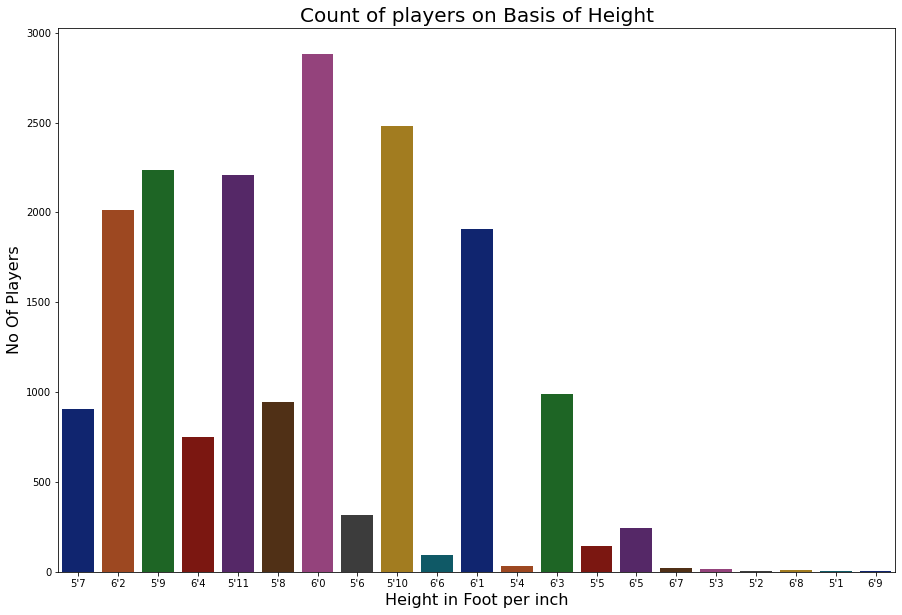

In [ ]:
snsplotting('Height')




In [ ]:
def snsplotting(name): 
    plt.figure(figsize = (13, 8))
    ax = sns.countplot(x = name,data = df_num, palette = 'dark')
    ax.set_title(label = f'Count of players on Basis of {name}', fontsize = 20)
    ax.set_xlabel(xlabel = f'{name} in Foot per inch', fontsize = 16)
    ax.set_ylabel(ylabel = 'Count', fontsize = 16)
    plt.show()

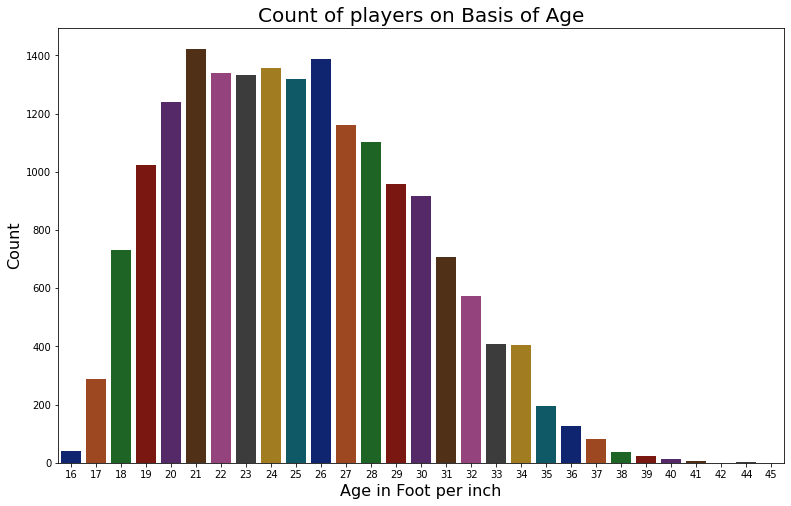

In [ ]:
snsplotting('Age')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Nationality               18207 non-null  object 
 3   Overall                   18207 non-null  int64  
 4   Potential                 18207 non-null  int64  
 5   Club                      18207 non-null  object 
 6   Value                     18207 non-null  float64
 7   Wage                      18207 non-null  float64
 8   Special                   18207 non-null  int64  
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T

In [ ]:
df3 =  df2[['Age', 'Overall', 'Potential','Value','Wage','Special','International Reputation','Weak Foot','Skill Moves','Jersey Number','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM',	'RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling', 'Curve', 'FKAccuracy' ,'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions','Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling' ,'GKKicking', 'GKPositioning', 'GKReflexes']]
df3.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,10.0,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000.0,405000.0,2228,5.0,4.0,5.0,7.0,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,10.0,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72000000.0,260000.0,1471,4.0,3.0,1.0,1.0,76.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102000000.0,355000.0,2281,4.0,5.0,4.0,7.0,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
# replcing NAn with 0
df3 = df3.fillna(0)

In [ ]:
df3.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,110500000.0,565000.0,2202,5.0,4.0,4.0,10.0,67.0,159.0,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,77000000.0,405000.0,2228,5.0,4.0,5.0,7.0,74.0,183.0,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,118500000.0,290000.0,2143,5.0,5.0,5.0,10.0,69.0,150.0,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,72000000.0,260000.0,1471,4.0,3.0,1.0,1.0,76.0,168.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,102000000.0,355000.0,2281,4.0,5.0,4.0,7.0,71.0,154.0,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [ ]:
from sklearn.preprocessing import normalize
data_scaled = normalize(football_df2)
data_scaled = pd.DataFrame(data_scaled, columns=football_df2.columns)
data_scaled.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,2.805393e-07,8.506676e-07,8.506676e-07,0.999987,0.005113,0.000020,4.524828e-08,3.619862e-08,3.619862e-08,9.049655e-08,6.063269e-07,0.000001,7.963697e-07,7.963697e-07,7.963697e-07,8.325683e-07,8.416180e-07,8.416180e-07,8.416180e-07,8.325683e-07,8.416180e-07,8.416180e-07,8.416180e-07,8.235186e-07,7.601711e-07,7.601711e-07,7.601711e-07,8.235186e-07,5.791779e-07,5.520290e-07,5.520290e-07,5.520290e-07,5.791779e-07,5.339297e-07,4.253338e-07,4.253338e-07,4.253338e-07,5.339297e-07,7.601711e-07,8.597173e-07,6.334759e-07,8.144690e-07,7.782704e-07,8.778166e-07,8.416180e-07,8.506676e-07,7.873200e-07,8.687669e-07,8.235186e-07,7.782704e-07,8.235186e-07,8.597173e-07,8.597173e-07,7.692207e-07,6.153766e-07,6.515752e-07,5.339297e-07,8.506676e-07,4.343835e-07,1.990924e-07,8.506676e-07,8.506676e-07,6.787242e-07,8.687669e-07,2.986386e-07,2.533904e-07,2.352910e-07,5.429793e-08,9.954621e-08,1.357448e-07,1.266952e-07,7.239724e-08
1,4.285655e-07,1.220762e-06,1.220762e-06,0.999986,0.005260,0.000029,6.493417e-08,5.194733e-08,6.493417e-08,9.090783e-08,9.610257e-07,0.000002,1.181802e-06,1.181802e-06,1.181802e-06,1.155828e-06,1.168815e-06,1.168815e-06,1.168815e-06,1.155828e-06,1.142841e-06,1.142841e-06,1.142841e-06,1.142841e-06,1.051934e-06,1.051934e-06,1.051934e-06,1.142841e-06,8.441442e-07,7.921968e-07,7.921968e-07,7.921968e-07,8.441442e-07,7.921968e-07,6.883022e-07,6.883022e-07,6.883022e-07,7.921968e-07,1.090894e-06,1.220762e-06,1.155828e-06,1.051934e-06,1.129855e-06,1.142841e-06,1.051934e-06,9.869993e-07,9.999862e-07,1.220762e-06,1.155828e-06,1.181802e-06,1.129855e-06,1.246736e-06,9.090783e-07,1.233749e-06,1.233749e-06,1.142841e-06,1.025960e-06,1.207776e-06,8.181705e-07,3.766182e-07,1.233749e-06,1.064920e-06,1.103881e-06,1.233749e-06,3.636313e-07,4.025918e-07,2.986972e-07,9.090783e-08,1.428552e-07,1.948025e-07,1.818157e-07,1.428552e-07
2,2.194086e-07,7.763690e-07,7.848078e-07,0.999997,0.002447,0.000018,4.219397e-08,4.219397e-08,4.219397e-08,8.438793e-08,5.822767e-07,0.000001,7.088586e-07,7.088586e-07,7.088586e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.426138e-07,6.835423e-07,6.835423e-07,6.835423e-07,7.426138e-07,5.485216e-07,5.063276e-07,5.063276e-07,5.063276e-07,5.485216e-07,5.063276e-07,3.966233e-07,3.966233e-07,3.966233e-07,5.063276e-07,6.666647e-07,7.341750e-07,5.232052e-07,7.088586e-07,7.088586e-07,8.101242e-07,7.426138e-07,7.341750e-07,6.582259e-07,8.016854e-07,7.932466e-07,7.594914e-07,8.101242e-07,7.932466e-07,7.088586e-07,6.751035e-07,5.147664e-07,6.835423e-07,4.135009e-07,6.919811e-07,4.725724e-07,3.037966e-07,7.510526e-07,7.341750e-07,6.835423e-07,7.932466e-07,2.278474e-07,2.025310e-07,2.784802e-07,7.594914e-08,7.594914e-08,1.265819e-07,1.265819e-07,9.282673e-08
3,3.749976e-07,1.263881e-06,1.291658e-06,0.999993,0.003611,0.000020,5.555519e-08,4.166639e-08,1.388880e-08,1.388880e-08,1.055549e-06,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.361096e-07,1.805544e-07,2.916648e-07,6.944399e-07,1.805544e-07,2.499984e-07,2.916648e-07,2.638872e-07,7.083287e-07,5.833295e-07,7.916615e-07,8.055503e-07,8.333279e-07,1.249992e-06,5.9721

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)
#https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
data_scaled.head()

,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,2.805393e-07,8.506676e-07,8.506676e-07,0.999987,0.005113,0.000020,4.524828e-08,3.619862e-08,3.619862e-08,9.049655e-08,6.063269e-07,0.000001,7.963697e-07,7.963697e-07,7.963697e-07,8.325683e-07,8.416180e-07,8.416180e-07,8.416180e-07,8.325683e-07,8.416180e-07,8.416180e-07,8.416180e-07,8.235186e-07,7.601711e-07,7.601711e-07,7.601711e-07,8.235186e-07,5.791779e-07,5.520290e-07,5.520290e-07,5.520290e-07,5.791779e-07,5.339297e-07,4.253338e-07,4.253338e-07,4.253338e-07,5.339297e-07,7.601711e-07,8.597173e-07,6.334759e-07,8.144690e-07,7.782704e-07,8.778166e-07,8.416180e-07,8.506676e-07,7.873200e-07,8.687669e-07,8.235186e-07,7.782704e-07,8.235186e-07,8.597173e-07,8.597173e-07,7.692207e-07,6.153766e-07,6.515752e-07,5.339297e-07,8.506676e-07,4.343835e-07,1.990924e-07,8.506676e-07,8.506676e-07,6.787242e-07,8.687669e-07,2.986386e-07,2.533904e-07,2.352910e-07,5.429793e-08,9.954621e-08,1.357448e-07,1.266952e-07,7.239724e-08
1,4.285655e-07,1.220762e-06,1.220762e-06,0.999986,0.005260,0.000029,6.493417e-08,5.194733e-08,6.493417e-08,9.090783e-08,9.610257e-07,0.000002,1.181802e-06,1.181802e-06,1.181802e-06,1.155828e-06,1.168815e-06,1.168815e-06,1.168815e-06,1.155828e-06,1.142841e-06,1.142841e-06,1.142841e-06,1.142841e-06,1.051934e-06,1.051934e-06,1.051934e-06,1.142841e-06,8.441442e-07,7.921968e-07,7.921968e-07,7.921968e-07,8.441442e-07,7.921968e-07,6.883022e-07,6.883022e-07,6.883022e-07,7.921968e-07,1.090894e-06,1.220762e-06,1.155828e-06,1.051934e-06,1.129855e-06,1.142841e-06,1.051934e-06,9.869993e-07,9.999862e-07,1.220762e-06,1.155828e-06,1.181802e-06,1.129855e-06,1.246736e-06,9.090783e-07,1.233749e-06,1.233749e-06,1.142841e-06,1.025960e-06,1.207776e-06,8.181705e-07,3.766182e-07,1.233749e-06,1.064920e-06,1.103881e-06,1.233749e-06,3.636313e-07,4.025918e-07,2.986972e-07,9.090783e-08,1.428552e-07,1.948025e-07,1.818157e-07,1.428552e-07
2,2.194086e-07,7.763690e-07,7.848078e-07,0.999997,0.002447,0.000018,4.219397e-08,4.219397e-08,4.219397e-08,8.438793e-08,5.822767e-07,0.000001,7.088586e-07,7.088586e-07,7.088586e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.510526e-07,7.426138e-07,6.835423e-07,6.835423e-07,6.835423e-07,7.426138e-07,5.485216e-07,5.063276e-07,5.063276e-07,5.063276e-07,5.485216e-07,5.063276e-07,3.966233e-07,3.966233e-07,3.966233e-07,5.063276e-07,6.666647e-07,7.341750e-07,5.232052e-07,7.088586e-07,7.088586e-07,8.101242e-07,7.426138e-07,7.341750e-07,6.582259e-07,8.016854e-07,7.932466e-07,7.594914e-07,8.101242e-07,7.932466e-07,7.088586e-07,6.751035e-07,5.147664e-07,6.835423e-07,4.135009e-07,6.919811e-07,4.725724e-07,3.037966e-07,7.510526e-07,7.341750e-07,6.835423e-07,7.932466e-07,2.278474e-07,2.025310e-07,2.784802e-07,7.594914e-08,7.594914e-08,1.265819e-07,1.265819e-07,9.282673e-08
3,3.749976e-07,1.263881e-06,1.291658e-06,0.999993,0.003611,0.000020,5.555519e-08,4.166639e-08,1.388880e-08,1.388880e-08,1.055549e-06,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.361096e-07,1.805544e-07,2.916648e-07,6.944399e-07,1.805544e-07,2.499984e-07,2.916648e-07,2.638872e-07,7.083287e-07,5.833295e-07,7.916615e-07,8.055503e-07,8.333279e-07,1.249992e-06,5.9721

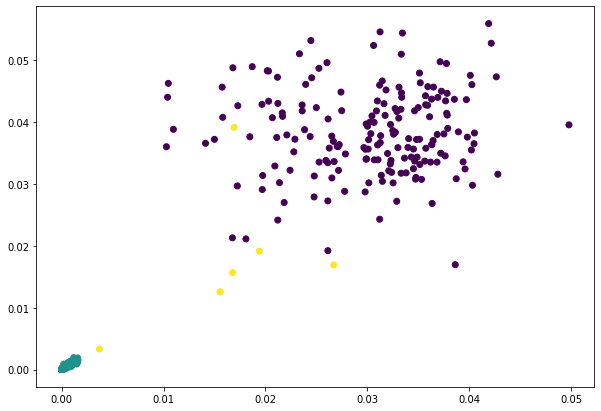

In [ ]:
plt.figure(figsize=(10, 7))  

#plt.scatter(data_scaled['Age'], data_scaled['Curve'], c=cluster.labels_) 
plt.scatter(data_scaled['Vision'], data_scaled['Balance'], c=cluster.labels_) 
#plt.scatter(data_scaled['Height'], data_scaled['Weight'], c=cluster.labels_) 
#plt.scatter(data_scaled['Potential'], data_scaled['Special'], c=cluster.labels_) 
#plt.scatter(data_scaled['LS'], data_scaled['RS'], c=cluster.labels_) 
#plt.scatter(data_scaled['Overall'], data_scaled['Value'], c=cluster.labels_) 

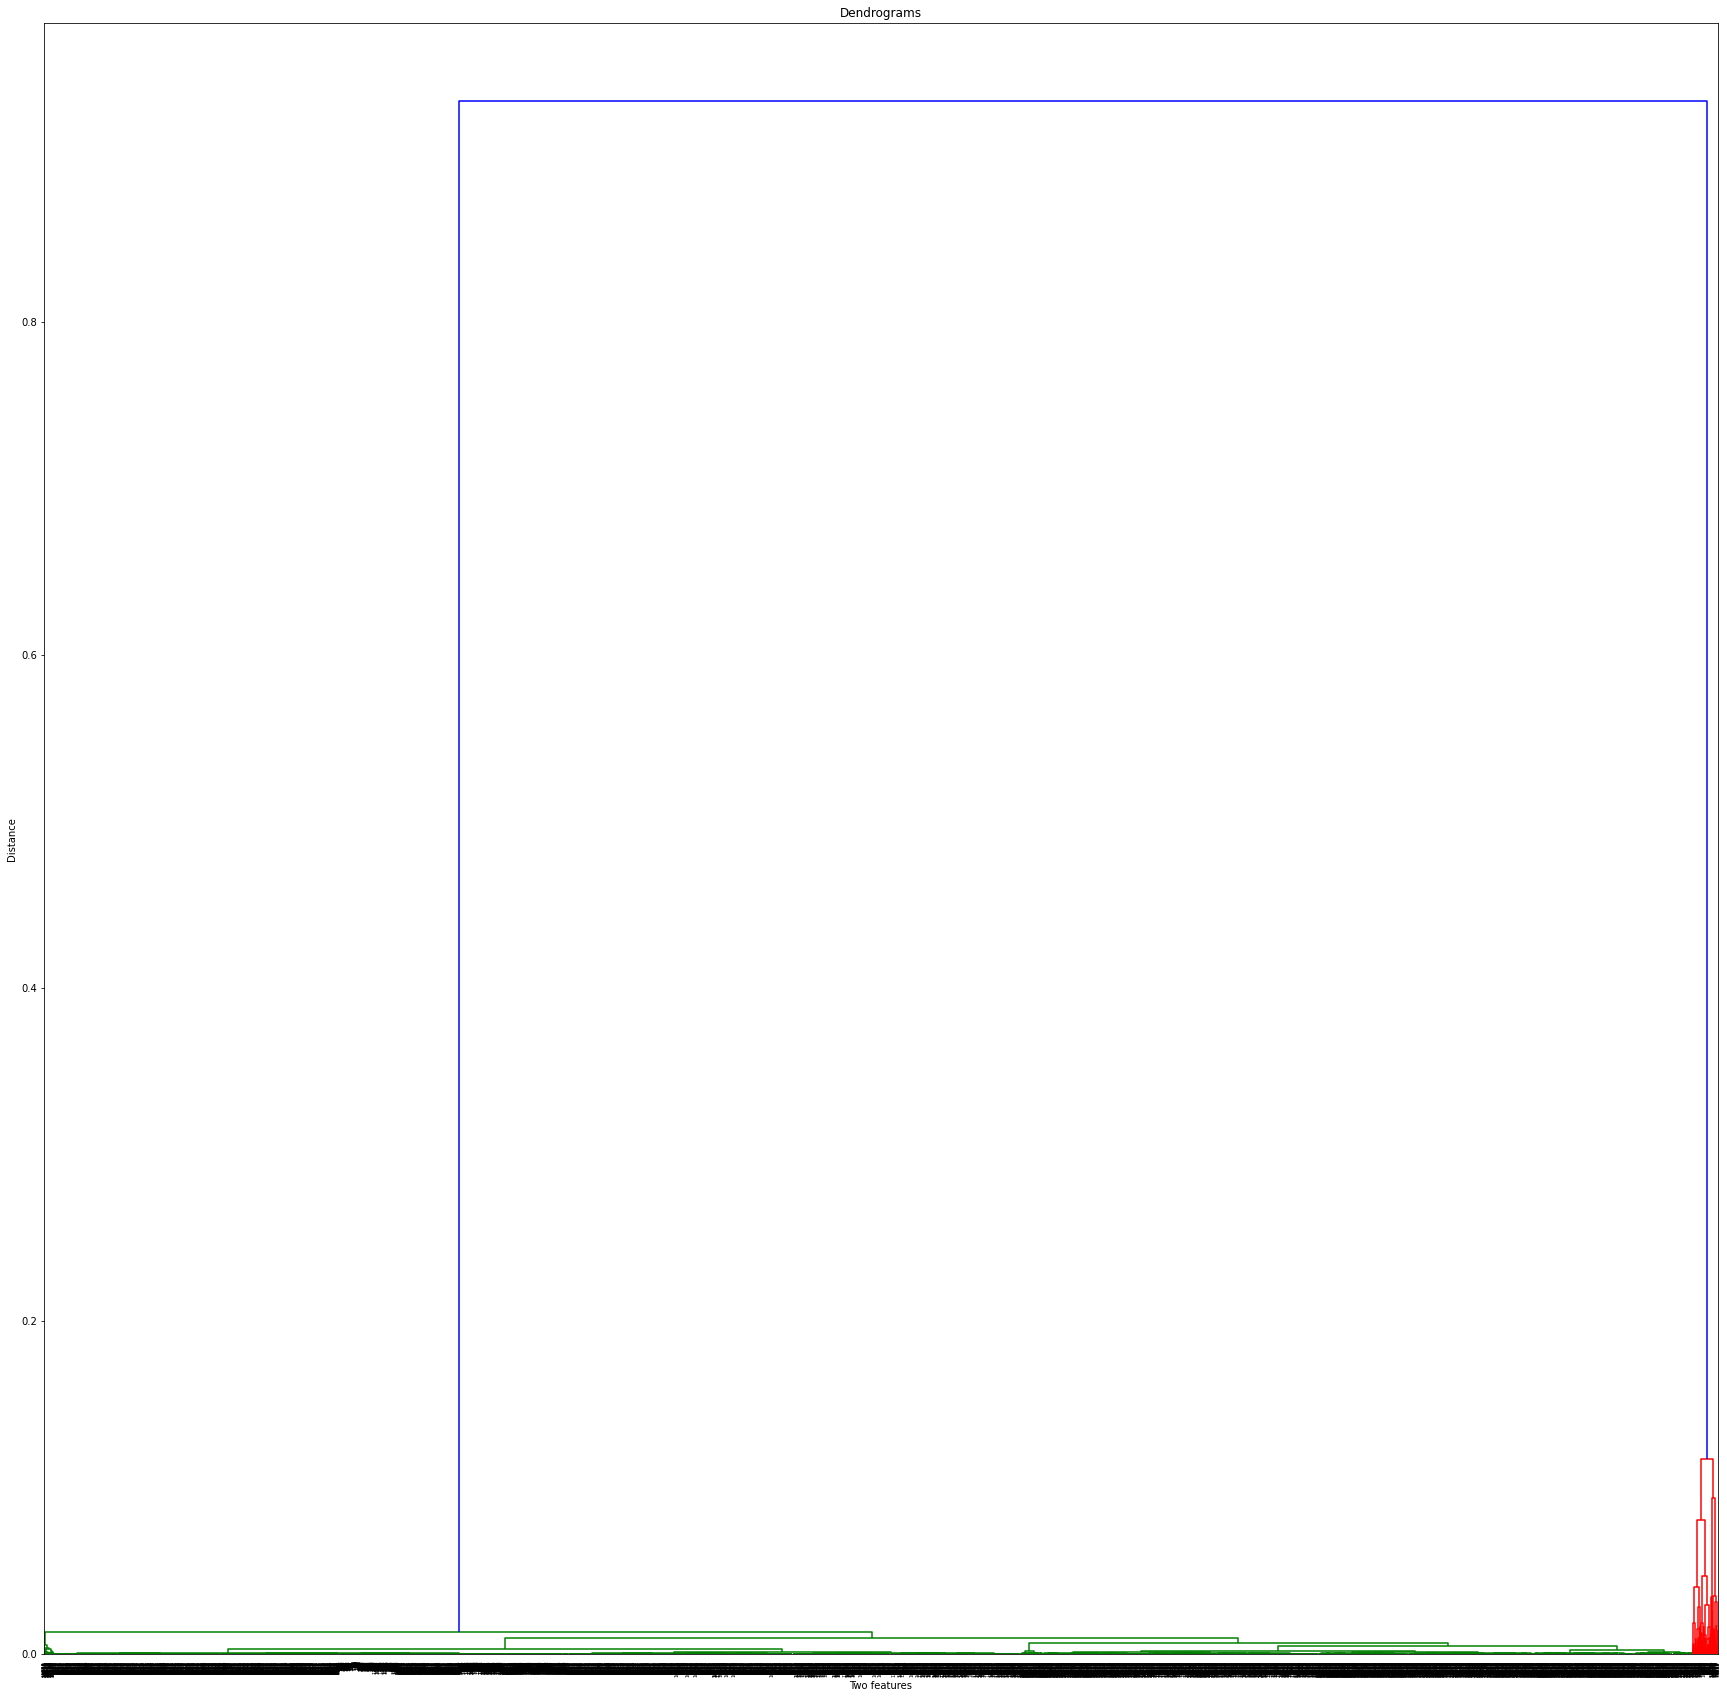

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(30, 30))  
plt.title("Dendrograms")  
plt.xlabel("Two features")
plt.ylabel("Distance")
x=data_scaled[['Vision', 'Balance']]
dend = shc.dendrogram(shc.linkage(x, method='ward'))

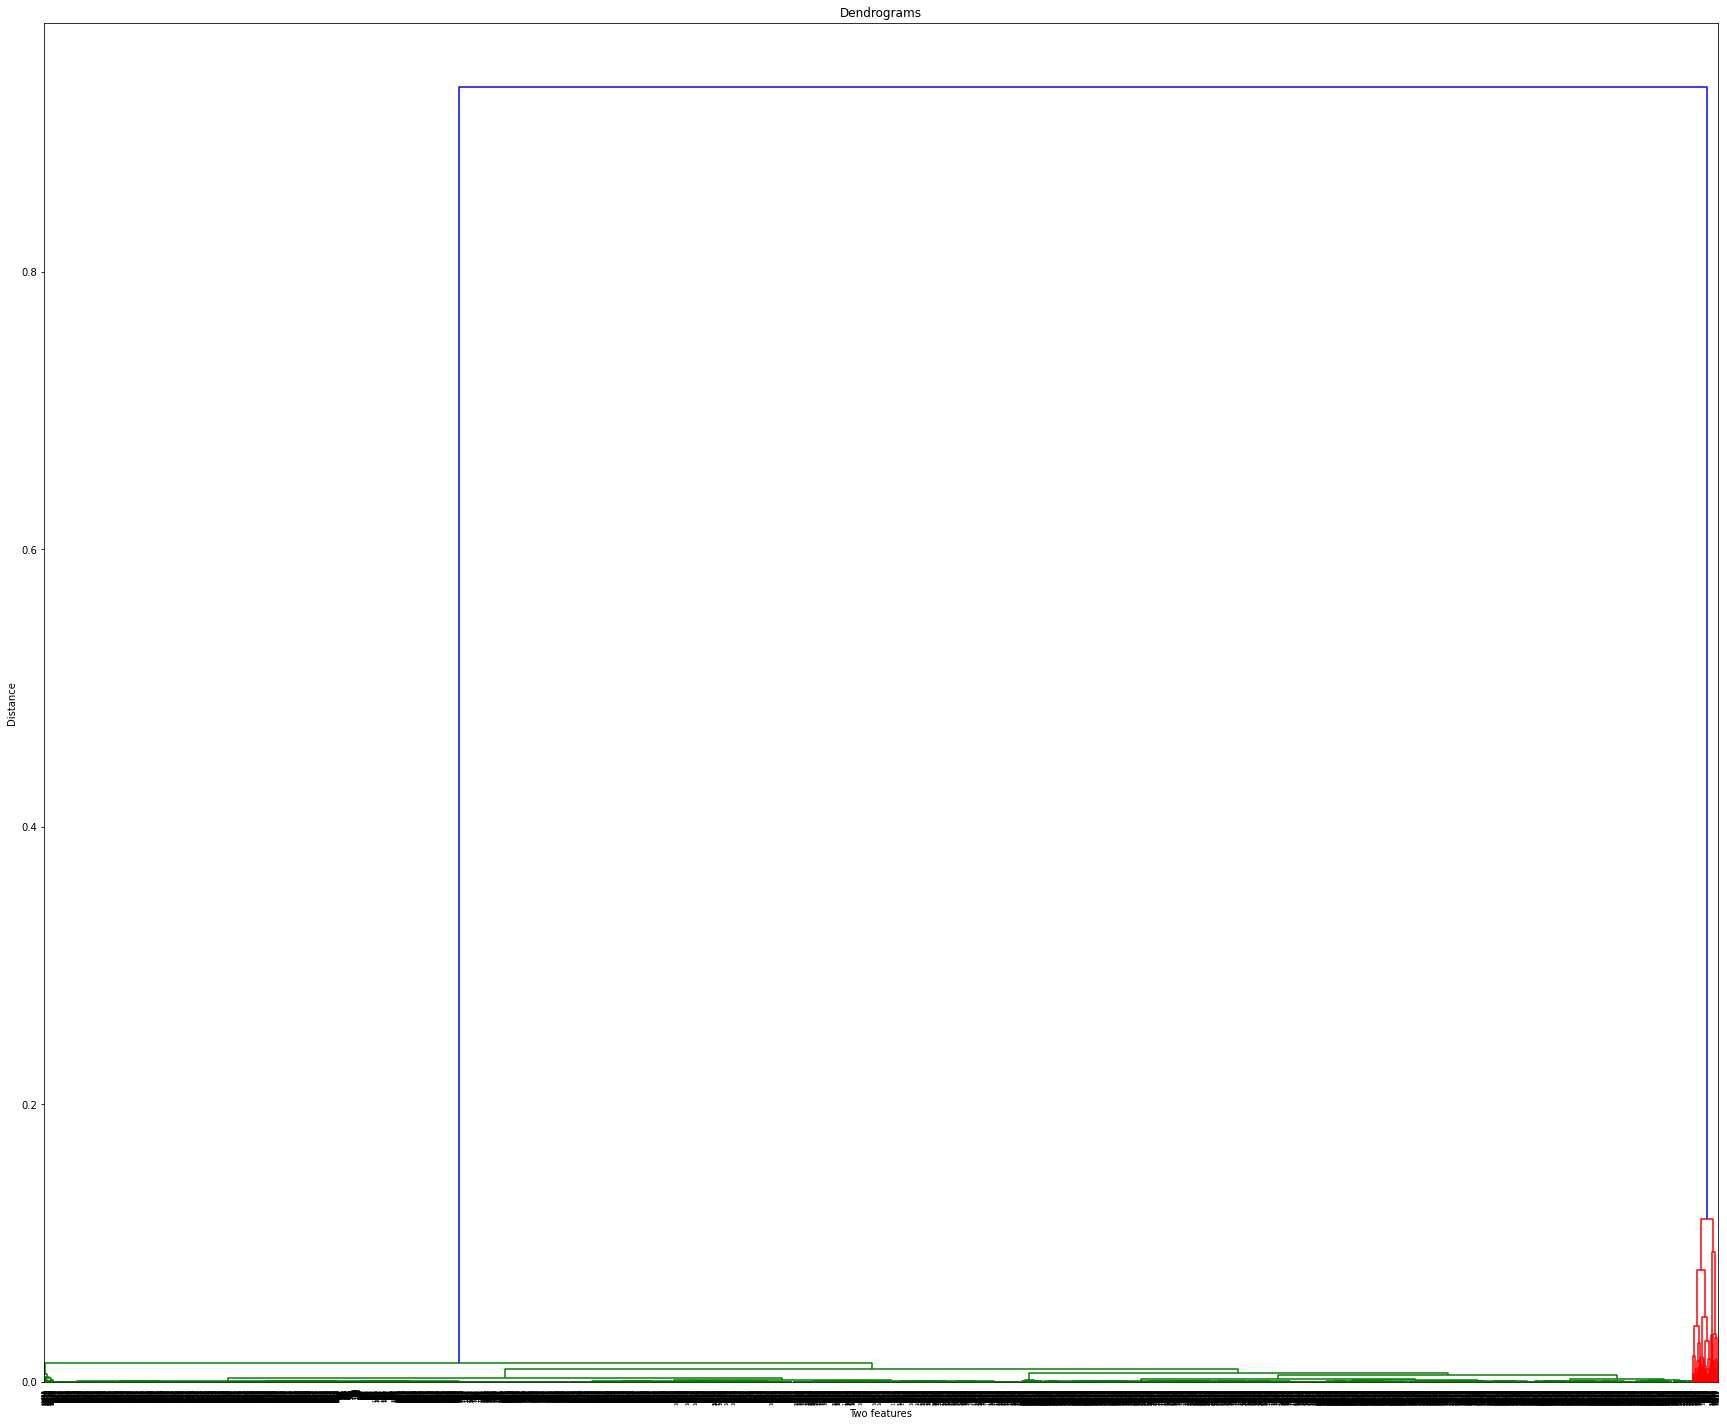

In [ ]:

plt.figure(figsize=(30, 25))  
plt.title("Dendrograms")   
plt.xlabel("Two features")
plt.ylabel("Distance")
y=data_scaled[['Vision', 'Balance']]
dend = shc.dendrogram(shc.linkage(y, method='ward'))
plt.hlines(1.6,0,1320)
plt.axhline(y=10, color='r', linestyle='--')

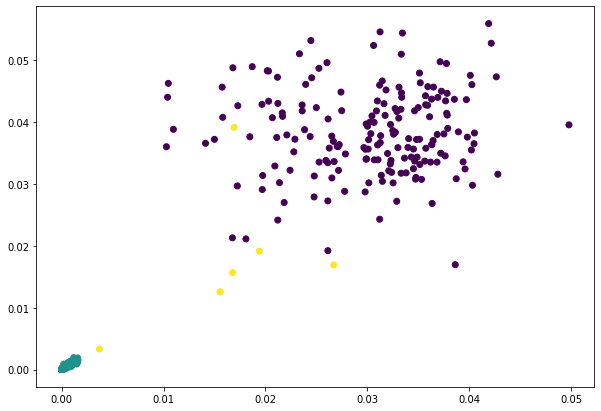

In [ ]:
plt.figure(figsize=(10, 7))  

#plt.scatter(data_scaled['Age'], data_scaled['Curve'], c=cluster.labels_) 
plt.scatter(data_scaled['Vision'], data_scaled['Balance'], c=cluster.labels_) 
#plt.scatter(data_scaled['Height'], data_scaled['Weight'], c=cluster.labels_) 
#plt.scatter(data_scaled['Potential'], data_scaled['Special'], c=cluster.labels_) 
#plt.scatter(data_scaled['LS'], data_scaled['RS'], c=cluster.labels_) 
#plt.scatter(data_scaled['Overall'], data_scaled['Value'], c=cluster.labels_) 

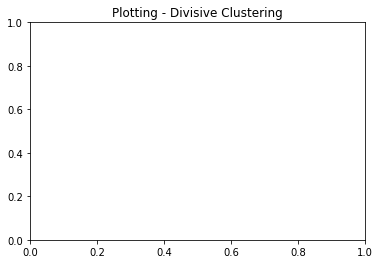

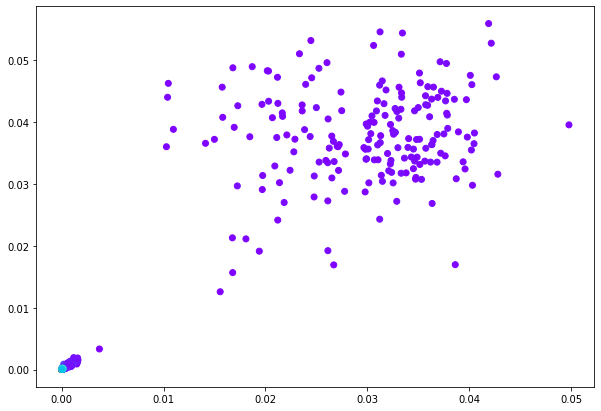

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12487)
kmeans.fit(data_scaled)

#print(kmeans.cluster_centers_)
#print(kmeans.labels_)
plt.title("Plotting - Divisive Clustering")
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Vision'], data_scaled['Balance'], c=kmeans.labels_, cmap='rainbow')

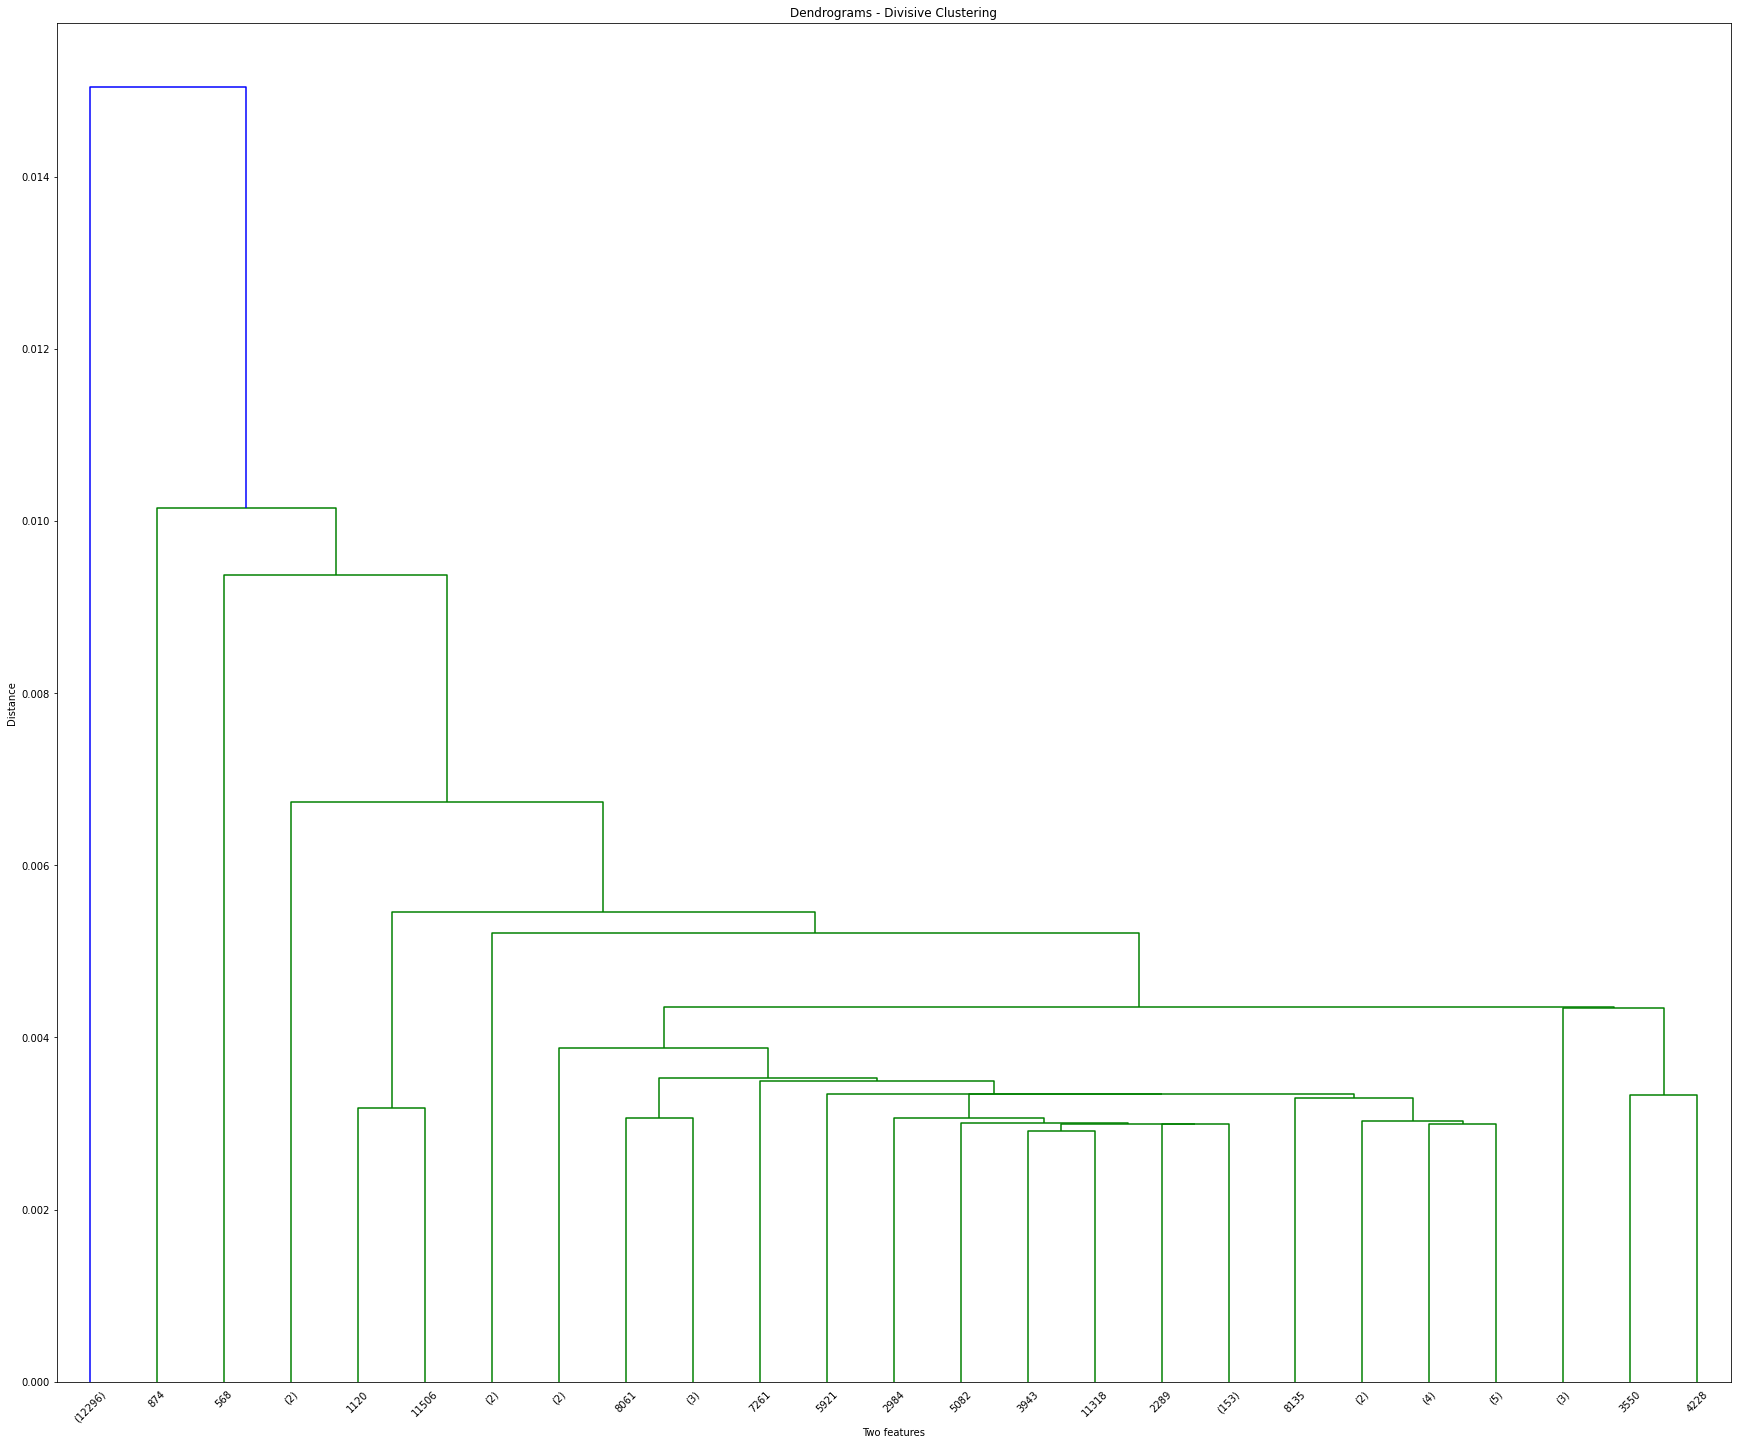

In [ ]:
import scipy.cluster.hierarchy as myhierarchy
plt.figure(figsize=(30, 25))  
plt.title("Dendrograms - Divisive Clustering")    
plt.xlabel("Two features")
plt.ylabel("Distance")
z=data_scaled[['Vision', 'Balance']]
dend1 = myhierarchy.dendrogram(myhierarchy.linkage(z, method='single'),show_leaf_counts=True,truncate_mode='lastp',p=25)

#We can remove the truncate mode lastp argument to see all the pairs of data